In [1]:
import os
import json
import h5py
import numpy as np

import robomimic
import robomimic.utils.file_utils as FileUtils
import robomimic.utils.env_utils as EnvUtils
import robomimic.utils.obs_utils as ObsUtils
import imageio
import tqdm
from robomimic.utils.file_utils import create_hdf5_filter_key

In [2]:
dataset_path ="/home/carl_lab/data_franka/drawer_ola/demo.hdf5"
f_org = h5py.File(dataset_path, "r")
demos = list(f_org["data"].keys())

In [3]:
print(demos)

['demo_0', 'demo_1', 'demo_10', 'demo_11', 'demo_12', 'demo_13', 'demo_14', 'demo_15', 'demo_16', 'demo_17', 'demo_18', 'demo_19', 'demo_2', 'demo_20', 'demo_21', 'demo_22', 'demo_23', 'demo_24', 'demo_25', 'demo_26', 'demo_27', 'demo_28', 'demo_29', 'demo_3', 'demo_30', 'demo_31', 'demo_32', 'demo_33', 'demo_34', 'demo_35', 'demo_36', 'demo_37', 'demo_38', 'demo_39', 'demo_4', 'demo_40', 'demo_41', 'demo_42', 'demo_43', 'demo_44', 'demo_45', 'demo_46', 'demo_47', 'demo_48', 'demo_49', 'demo_5', 'demo_50', 'demo_51', 'demo_52', 'demo_53', 'demo_54', 'demo_55', 'demo_56', 'demo_57', 'demo_58', 'demo_59', 'demo_6', 'demo_60', 'demo_61', 'demo_62', 'demo_63', 'demo_64', 'demo_65', 'demo_66', 'demo_67', 'demo_68', 'demo_69', 'demo_7', 'demo_70', 'demo_71', 'demo_72', 'demo_73', 'demo_74', 'demo_75', 'demo_76', 'demo_77', 'demo_78', 'demo_79', 'demo_8', 'demo_80', 'demo_81', 'demo_82', 'demo_83', 'demo_84', 'demo_85', 'demo_86', 'demo_87', 'demo_88', 'demo_89', 'demo_9', 'demo_90', 'demo_91

In [4]:
lengths=[]
for demo_name in demos:
    demo=f_org['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths.append(num_samples)

lengths=np.array(lengths)

print('Number of demos: ', len(demos))
print('Max length: ', np.max(lengths))
print('Min length: ', np.min(lengths))
print('Mean length: ', np.mean(lengths))

Number of demos:  100
Max length:  564
Min length:  187
Mean length:  316.15


In [3]:
for demo_name in demos:
    demo=f_org['data'][demo_name]
    # print(demo_name)

In [4]:
demo_0=f_org['data'][demos[0]]
demo_15=f_org['data'][demos[15]]
demo_30=f_org['data'][demos[30]]
demo_70=f_org['data'][demos[70]]

In [7]:
step = 0
key = 'ee_states'
obs_0 = demo_0['obs'][key][step]
obs_15 = demo_15['obs'][key][step]
obs_30 = demo_30['obs'][key][step]
obs_70 = demo_70['obs'][key][step]

i = 2
print(obs_0[i])
print(obs_15[i])
print(obs_30[i])
print(obs_30[i])
print(obs_70[i])




# Column-Major Storage:
# The std::array<double, 16> stores the matrix elements in column-major order. This means that the elements are stored sequentially as:
# R00, R10, R20, 0, R01, R11, R21, 0, R02, R12, R22, 0, T0, T1, T2, 1


0.037167728663951904
0.02981954008645097
0.022263596379088327
0.022263596379088327
0.03454664713377911


1st task pick cutter: gripper closed and hight > step 84 got that from cam in hand 
when i goes from negative to positive

open = [0.07852682]
close = [0.01599837]

2nd task end when gripper is open  

In [46]:
demo
list(demo.keys())

['actions', 'obs']

In [7]:
obs = demo['obs']
list(obs.keys())

['agentview_rgb',
 'ee_states',
 'eye_in_hand_rgb',
 'gripper_states',
 'joint_states']

In [8]:
obs = demo['obs']['agentview_rgb']
print(len(obs))

283


In [9]:
import matplotlib.pyplot as plt

In [ ]:
agentview_rgb = demo['obs']['agentview_rgb']
eye_in_hand_rgb = demo['obs']['eye_in_hand_rgb']
for i in range(0,len(obs),10): 
                
    # Convert the dataset to a NumPy array for plotting
    image_data = np.array(agentview_rgb[i])
    image_data = image_data[..., [2, 1, 0]]  # Switch R and B channels

    # Plot the image
    plt.imshow(image_data)
    plt.title("Agent View RGB")
    plt.axis('off')  # Optional: turn off axis
    plt.show()

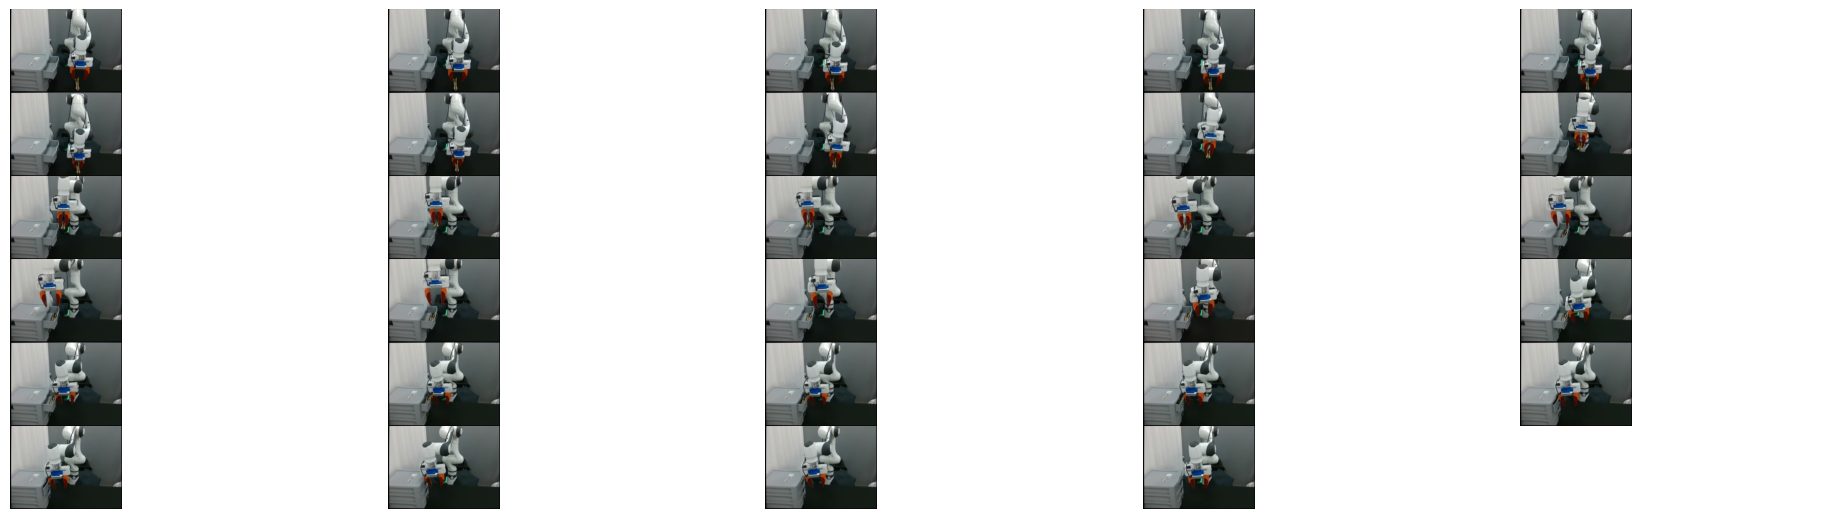

In [11]:
# Parameters for the display
step = 10  # Plot every 10th frame
frames_to_display = range(0, len(agentview_rgb), step)

# Set up the subplot grid (1 row, up to 5 columns)
num_columns = min(5, len(frames_to_display))  # Limit to 5 columns for now
num_rows = int(np.ceil(len(frames_to_display) / num_columns))  # Ensure enough rows for all images
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5))

# Flatten axes array to iterate easily
axes = axes.flatten()

# Loop through selected frames and plot them side by side
for ax, i in zip(axes, frames_to_display):
    # Access and process the image
    image_data = np.array(agentview_rgb[i])
    image_data = image_data[..., [2, 1, 0]]  # Switch R and B channels

    # Plot the image in the respective subplot
    ax.imshow(image_data)
    # ax.set_title(f"Step {i}")  # Add the step number as the title
    ax.axis('off')  # Hide axes for better visualization

# Hide any unused subplots
for ax in axes[len(frames_to_display):]:
    ax.axis('off')  # Turn off unused axes

# Adjust layout and show all images
plt.subplots_adjust(wspace=0, hspace=0)  # Remove space between images
plt.tight_layout(pad=0.0)  # Ensure tight layout with no padding
plt.show()

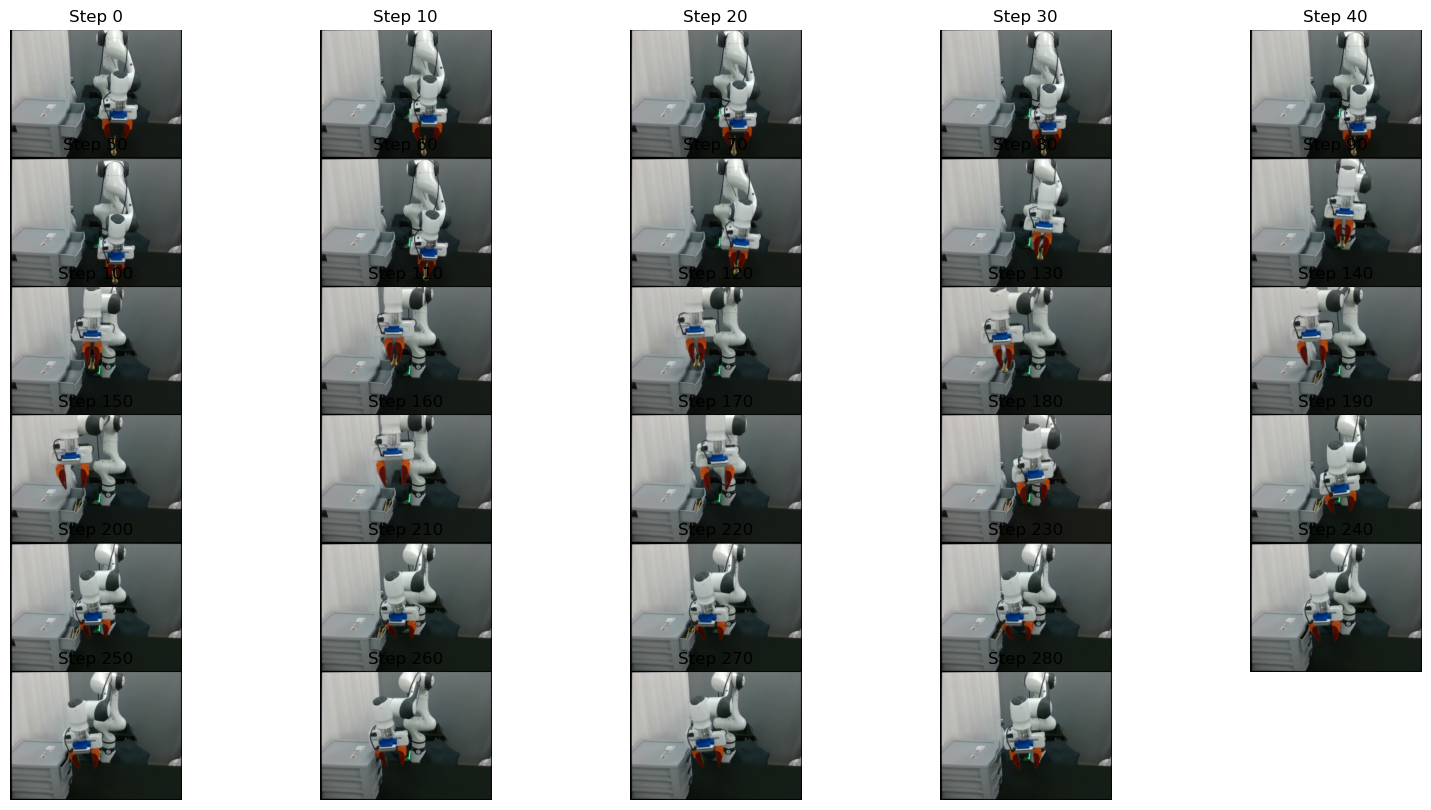

In [12]:
step = 10  # Plot every 10th frame
frames_to_display = range(0, len(agentview_rgb), step)
# Set up the number of columns and rows
num_columns = min(5, len(frames_to_display))  # Limit to 5 columns for now
num_rows = int(np.ceil(len(frames_to_display) / num_columns))  # Ensure enough rows for all images

# Create a gridspec layout with no space between the images
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(num_rows, num_columns, hspace=0, wspace=0)  # No space between subplots

# Loop through selected frames and plot them side by side
for idx, i in enumerate(frames_to_display):
    # Calculate row and column for the current image
    row = idx // num_columns
    col = idx % num_columns

    # Access and process the image
    image_data = np.array(agentview_rgb[i])
    image_data = image_data[..., [2, 1, 0]]  # Switch R and B channels

    # Add a subplot in the current grid position
    ax = fig.add_subplot(gs[row, col])

    # Plot the image in the respective subplot
    ax.imshow(image_data)
    ax.set_title(f"Step {i}")  # Add the step number as the title
    ax.axis('off')  # Hide axes for better visualization

# Show the images
plt.show()

In [13]:
print(demo['obs']['gripper_states'][0])
print( demo['obs']['gripper_states'][70])

[0.07852682]
[0.01599837]


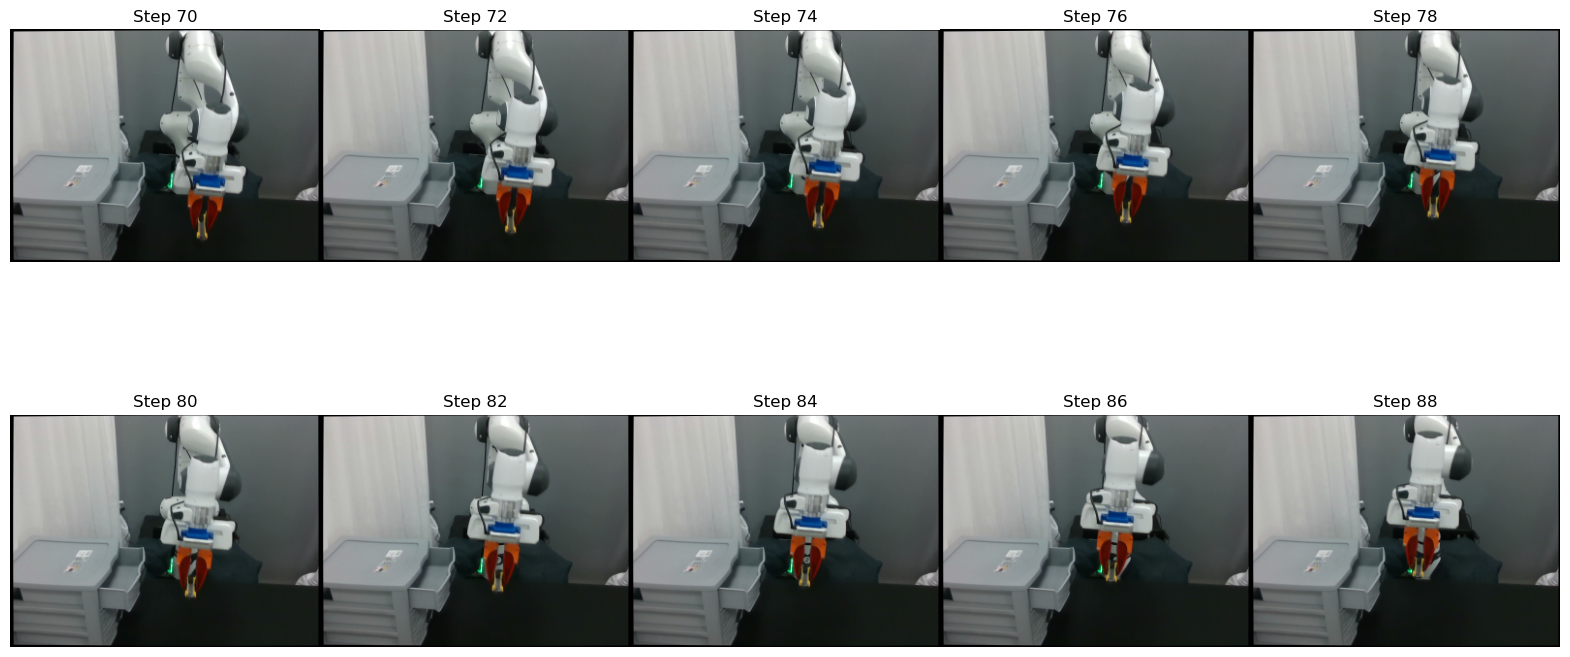

In [14]:
step = 2  # Plot every 10th frame
frames_to_display = range(70, 90, step)
# Set up the number of columns and rows
num_columns = min(5, len(frames_to_display))  # Limit to 5 columns for now
num_rows = int(np.ceil(len(frames_to_display) / num_columns))  # Ensure enough rows for all images

# Create a gridspec layout with no space between the images
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(num_rows, num_columns, hspace=0, wspace=0)  # No space between subplots

# Loop through selected frames and plot them side by side
for idx, i in enumerate(frames_to_display):
    # Calculate row and column for the current image
    row = idx // num_columns
    col = idx % num_columns

    # Access and process the image
    image_data = np.array(agentview_rgb[i])
    image_data = image_data[..., [2, 1, 0]]  # Switch R and B channels

    # Add a subplot in the current grid position
    ax = fig.add_subplot(gs[row, col])

    # Plot the image in the respective subplot
    ax.imshow(image_data)
    ax.set_title(f"Step {i}")  # Add the step number as the title
    ax.axis('off')  # Hide axes for better visualization

# Show the images
plt.show()

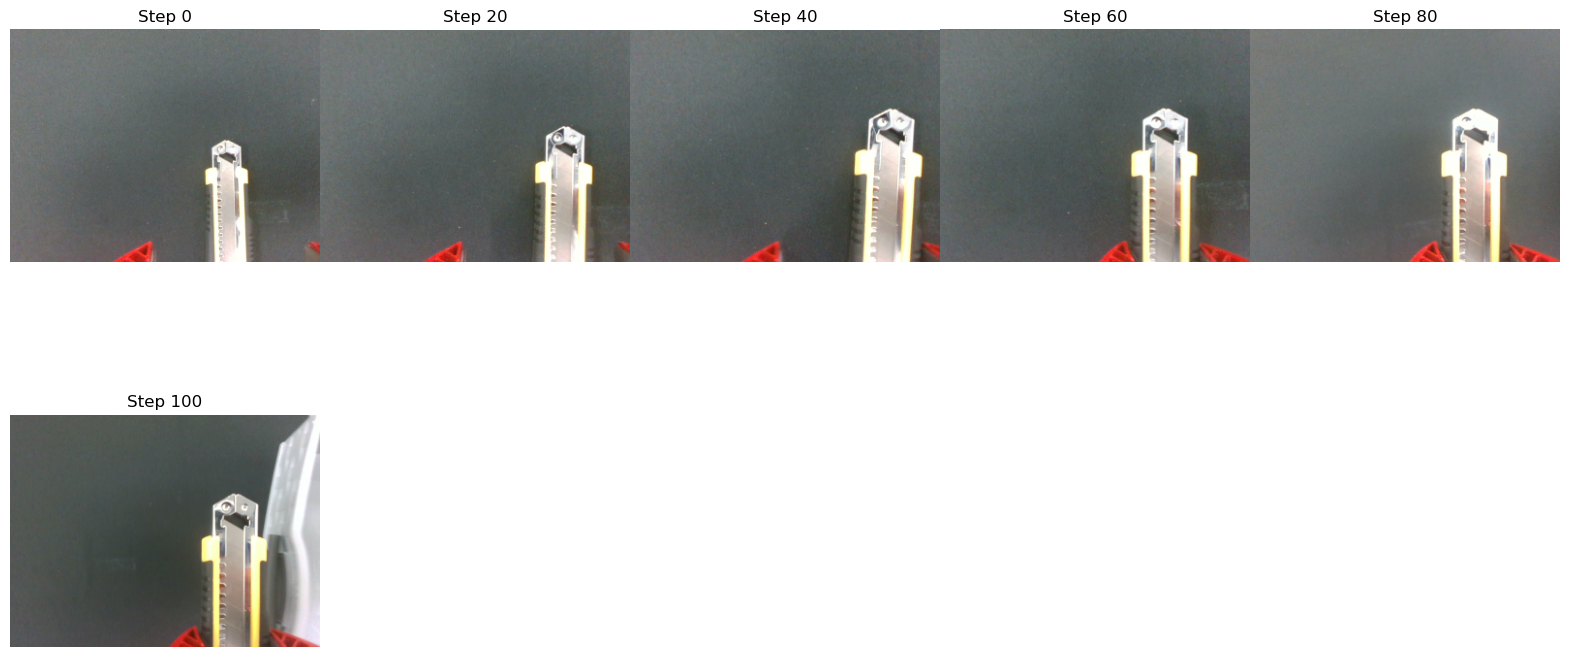

In [15]:
step = 20  # Plot every 10th frame
frames_to_display = range(0, 120, step)
# Set up the number of columns and rows
num_columns = min(5, len(frames_to_display))  # Limit to 5 columns for now
num_rows = int(np.ceil(len(frames_to_display) / num_columns))  # Ensure enough rows for all images

# Create a gridspec layout with no space between the images
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(num_rows, num_columns, hspace=0, wspace=0)  # No space between subplots

# Loop through selected frames and plot them side by side
for idx, i in enumerate(frames_to_display):
    # Calculate row and column for the current image
    row = idx // num_columns
    col = idx % num_columns

    # Access and process the image
    image_data = np.array(eye_in_hand_rgb[i])
    image_data = image_data[..., [2, 1, 0]]  # Switch R and B channels

    # Add a subplot in the current grid position
    ax = fig.add_subplot(gs[row, col])

    # Plot the image in the respective subplot
    ax.imshow(image_data)
    ax.set_title(f"Step {i}")  # Add the step number as the title
    ax.axis('off')  # Hide axes for better visualization

# Show the images
plt.show()

In [16]:
# Loop through selected frames and plot them side by side
for idx, i in enumerate(frames_to_display):
    # Calculate row and column for the current image
    row = idx // num_columns
    col = idx % num_columns

    # Access and process the image
    image_data = np.array(eye_in_hand_rgb[i])
    image_data = image_data[..., [2, 1, 0]]  # Switch R and B channels

    # Add a subplot in the current grid position
    ax = fig.add_subplot(gs[row, col])

    # Plot the image in the respective subplot
    ax.imshow(image_data)
    ax.set_title(f"Step {i}")  # Add the step number as the title
    ax.axis('off')  # Hide axes for better visualization

# Show the images
plt.show()

In [19]:
ee_states = demo['obs']['ee_states']
for i in range(0,90):
    print("i= ", i , " ee state:", ee_states[i][2])
    
# max(ee_states[:2])


i=  0  ee state: 0.037167728663951904
i=  1  ee state: 0.03716840120814688
i=  2  ee state: 0.03523730164501382
i=  3  ee state: 0.03157508126073259
i=  4  ee state: 0.027630897597849917
i=  5  ee state: 0.02397776572801067
i=  6  ee state: 0.02056680421550266
i=  7  ee state: 0.017377056731070224
i=  8  ee state: 0.014529803926805494
i=  9  ee state: 0.011354339304551087
i=  10  ee state: 0.007951906778754387
i=  11  ee state: 0.0047292377862167695
i=  12  ee state: 0.0017746910653706556
i=  13  ee state: -0.00044758119160253533
i=  14  ee state: -0.0030137484749501557
i=  15  ee state: -0.004859327221656313
i=  16  ee state: -0.007637780653413061
i=  17  ee state: -0.009760290620344262
i=  18  ee state: -0.012588482966051218
i=  19  ee state: -0.01581294800475956
i=  20  ee state: -0.01773624016764893
i=  21  ee state: -0.019877888167743094
i=  22  ee state: -0.02270413952465717
i=  23  ee state: -0.026835648286249895
i=  24  ee state: -0.028942315502641536
i=  25  ee state: -0.03212

In [22]:

agentview_rgb = demo['obs']['agentview_rgb']

# Parameters for the display
step = 10  # Plot every 10th frame
frames_to_display = range(0, len(agentview_rgb), step)

# Get the first image to extract dimensions (height, width)
first_image = np.array(agentview_rgb[frames_to_display[0]])
first_image = first_image[..., [2, 1, 0]]  # Switch R and B channels
height, width, _ = first_image.shape

# Define the output video parameters (MP4 format)
video_name = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' codec for MP4 files
fps = 30  # Frames per second
video_writer = cv2.VideoWriter(video_name, fourcc, fps, (width, height))

# Loop through selected frames and add them to the video
for i in frames_to_display:
    # Access and process the image
    image_data = np.array(agentview_rgb[i])
    image_data = image_data[..., [2, 1, 0]]  # Switch R and B channels

    # Write the image to the video
    video_writer.write(image_data)

# Release the video writer to finalize the video
video_writer.release()

print(f"Video saved as {video_name}")


NameError: name 'cv2' is not defined

In [20]:
f_org.close()

In [21]:
import h5py
import numpy as np
import csv

# Thresholds for gripper states
GRIPPER_OPEN = 0.07852682
GRIPPER_CLOSED = 0.01599837
TOLERANCE = 0.005  # Allow slight deviations

# Load the HDF5 file
file_path ="/home/carl_lab/data_franka/drawer_ola/demo.hdf5"
f_org = h5py.File(file_path, 'r')

# Get the list of demos
demos = list(f_org['data'].keys())
print(demos)


['demo_0', 'demo_1', 'demo_10', 'demo_11', 'demo_12', 'demo_13', 'demo_14', 'demo_15', 'demo_16', 'demo_17', 'demo_18', 'demo_19', 'demo_2', 'demo_20', 'demo_21', 'demo_22', 'demo_23', 'demo_24', 'demo_25', 'demo_26', 'demo_27', 'demo_28', 'demo_29', 'demo_3', 'demo_30', 'demo_31', 'demo_32', 'demo_33', 'demo_34', 'demo_35', 'demo_36', 'demo_37', 'demo_38', 'demo_39', 'demo_4', 'demo_40', 'demo_41', 'demo_42', 'demo_43', 'demo_44', 'demo_45', 'demo_46', 'demo_47', 'demo_48', 'demo_49', 'demo_5', 'demo_50', 'demo_51', 'demo_52', 'demo_53', 'demo_54', 'demo_55', 'demo_56', 'demo_57', 'demo_58', 'demo_59', 'demo_6', 'demo_60', 'demo_61', 'demo_62', 'demo_63', 'demo_64', 'demo_65', 'demo_66', 'demo_67', 'demo_68', 'demo_69', 'demo_7', 'demo_70', 'demo_71', 'demo_72', 'demo_73', 'demo_74', 'demo_75', 'demo_76', 'demo_77', 'demo_78', 'demo_79', 'demo_8', 'demo_80', 'demo_81', 'demo_82', 'demo_83', 'demo_84', 'demo_85', 'demo_86', 'demo_87', 'demo_88', 'demo_89', 'demo_9', 'demo_90', 'demo_91

In [29]:
# Output list to store results
results = []
# Loop through each demo
# for demo_name in demos:
for i in range(10):
    demo_name = demos[i]
    demo = f_org['data'][demo_name]
    # print("demo", demo)
    
    first_task_done = None
    second_task_done = None
    length = len(demo['obs']['ee_states'])
    # Loop through time steps
    for t in range(length):
        ee_z = demo['obs']['ee_states'][t][2]  # End-effector position in Z
        gripper_state = demo['obs']['gripper_states'][t][0]  # Gripper state
        
        # print(f"Time step {t}: gripper_state = {gripper_state}, ee_z = {ee_z}")

        # Check for the first task
        if first_task_done is None:
            if (
                abs(gripper_state - GRIPPER_CLOSED) <= TOLERANCE and
                ee_z - 0.01 > demo['obs']['ee_states'][t - 1][2]  # Ensure previous step was negative
            ):
                first_task_done = t
                print(f"First task (pick cutter) completed at time step {t}")

        # Check for the second task only after the first is done
        elif second_task_done is None:
            if abs(gripper_state - GRIPPER_OPEN) <= TOLERANCE:
                second_task_done = t
                print(f"Second task completed at time step {t}")
                break  # No need to process further

    # Save the results if both tasks were completed
    if first_task_done is not None and second_task_done is not None:
        results.append({
            "demo_name": demo_name,
            "first_task_time": first_task_done,
            "second_task_time": second_task_done
        })


First task (pick cutter) completed at time step 61
Second task completed at time step 143
First task (pick cutter) completed at time step 52
Second task completed at time step 85
First task (pick cutter) completed at time step 86
Second task completed at time step 162
First task (pick cutter) completed at time step 53
Second task completed at time step 147
First task (pick cutter) completed at time step 74
Second task completed at time step 152
First task (pick cutter) completed at time step 61
Second task completed at time step 165
First task (pick cutter) completed at time step 44
Second task completed at time step 145
First task (pick cutter) completed at time step 49
Second task completed at time step 136


In [30]:
# Save the results to a CSV file
output_file = "task_completion_times_2.csv"
with open(output_file, mode='w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=["demo_name", "first_task_time", "second_task_time"])
    writer.writeheader()
    writer.writerows(results)

print(f"Results saved to {output_file}")

Results saved to task_completion_times_2.csv


In [32]:
import h5py
import csv
import cv2
import numpy as np

# File paths
hdf5_file_path = "/home/carl_lab/data_franka/drawer_ola/demo.hdf5"  # Replace with the actual HDF5 file path
csv_file_path = "task_completion_times_2.csv"
output_dir = "/home/carl_lab/diffusion_policy/videos_2"  # Directory to save the videos

# Create output directory if it doesn't exist
import os
os.makedirs(output_dir, exist_ok=True)

# Load HDF5 file
f_org = h5py.File(hdf5_file_path, 'r')

# Read task completion times from CSV
with open(csv_file_path, mode='r') as csvfile:
    reader = csv.DictReader(csvfile)
    task_times = [row for row in reader]

# Function to create a video from frames
def create_video(frames, output_path, fps=10):
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for frame in frames:
        out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # Convert RGB to BGR for OpenCV
        image_data = image_data[..., [2, 1, 0]]  # Switch R and B channels
    out.release()

# Process each demo
for task_time in task_times:
    demo_name = task_time["demo_name"]
    
    task1_start = 0
    print("task1_start", task1_start)
    
    task1_end = int(task_time["first_task_time"])
    task2_start = task1_end
    print("task2_start", task2_start)
    
    task2_end = int(task_time["second_task_time"])
    task3_start = task2_end
    print("task3_start", task3_start)

    demo = f_org['data'][demo_name]
    frames = demo['obs']['agentview_rgb']  # RGB frames

    # Extract frames for each segment
    task1_frames = [np.array(frames[i]) for i in range(task1_start, task1_end)]
    task2_frames = [np.array(frames[i]) for i in range(task2_start, task2_end)]
    task3_frames = [np.array(frames[i]) for i in range(task3_start, len(frames))]

    # Save videos for each task
    create_video(task1_frames, os.path.join(output_dir, f"{demo_name}_task1.mp4"))
    create_video(task2_frames, os.path.join(output_dir, f"{demo_name}_task2.mp4"))
    create_video(task3_frames, os.path.join(output_dir, f"{demo_name}_task3.mp4"))

    print(f"Videos created for demo {demo_name}")

print(f"All videos saved to {output_dir}")


task1_start 0
task2_start 61
task3_start 143
Videos created for demo demo_0
task1_start 0
task2_start 52
task3_start 85
Videos created for demo demo_10
task1_start 0
task2_start 86
task3_start 162
Videos created for demo demo_11
task1_start 0
task2_start 53
task3_start 147
Videos created for demo demo_13
task1_start 0
task2_start 74
task3_start 152
Videos created for demo demo_14
task1_start 0
task2_start 61
task3_start 165
Videos created for demo demo_15
task1_start 0
task2_start 44
task3_start 145
Videos created for demo demo_16
task1_start 0
task2_start 49
task3_start 136
Videos created for demo demo_17
All videos saved to /home/carl_lab/diffusion_policy/videos_2
